# <center>Генерация и перенос стиля
## <center>Введение в генеративное моделирование
>**Генеративная модель** осуществляет автоматическое обнаружение и изучение закономерностей во входных данных таким образом, чтобы её можно было использовать для создания  новых данных.

Предположим, у нас есть набор данных, содержащий портреты знаменитых учёных. Мы можем построить модель, которая создаст образ никогда не существовавшего учёного, однако он будет всё ещё похож на человека, так как модель усвоила общие правила, управляющие внешним видом выбранных учёных.

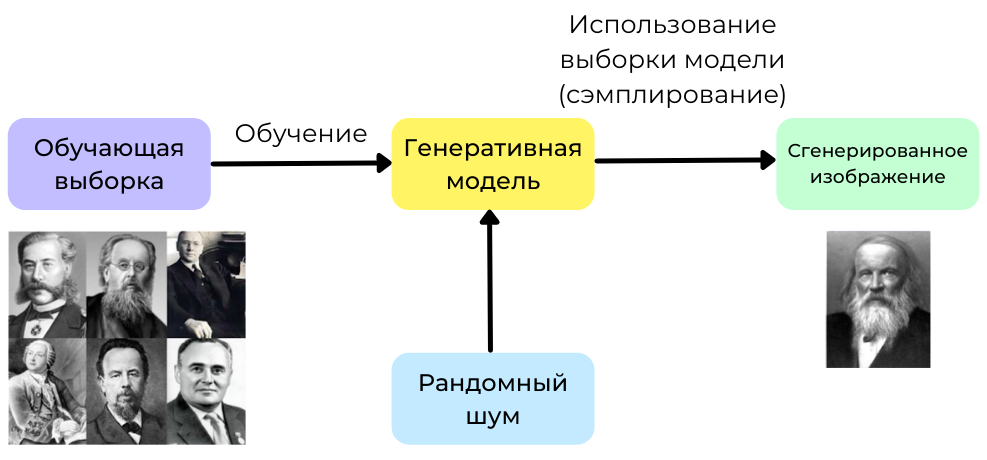

На схеме ниже показан процесс дискриминативного моделирования

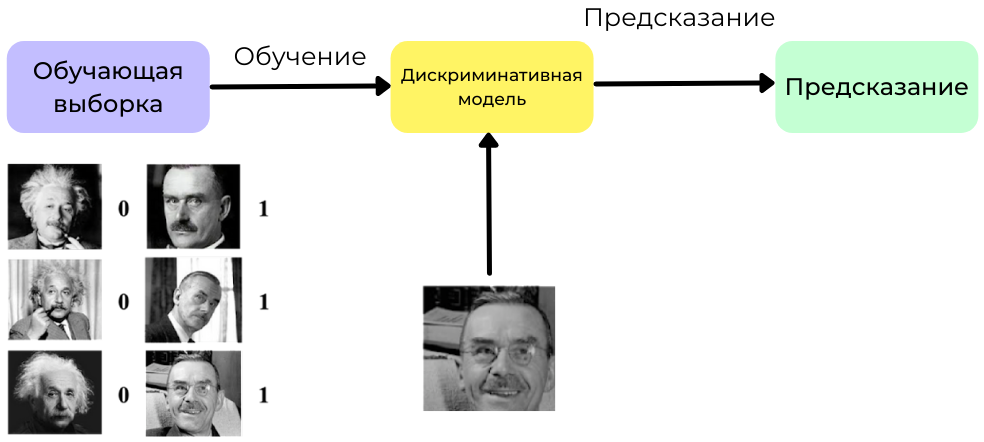

## <center>Автоэнкодеры
>**Автоэнкодер** — это особый тип нейронной сети, которая в основном предназначена для кодирования входных данных в сжатое и осмысленное представление, а затем декодирования его обратно так, чтобы восстановленные данные были максимально похожи на исходные.

Автоэнкодеры используются не только для генеративного моделирования. Существуют их вариации, способные решать следующие задачи:

* классификация;
* кластеризация;
* обнаружение аномалий;
* уменьшение размерности данных;
* очистка шумных изображений.

Автоэнкодеры пытаются найти какое-то информативное представление предоставленных данных, чтобы с его помощью можно было нарисовать множество различных примеров. 

Такая модель состоит из двух частей:
* кодировщика (*encoder*);
* декодера (*decoder*).

>**Цель кодировщика** — сжать входные данные большой размерности в скрытый вектор представления меньшей размерности (например, ширина и высота кирпича).

>**Цель декодера** — распаковать это представление обратно в исходный формат данных. Идея состоит в том, что после обучения модели мы можем отбросить кодировщик, случайным образом выбрать точку в скрытом пространстве, и декодер нарисует для нас новый образец (например, кирпич с заданной шириной и высотой).

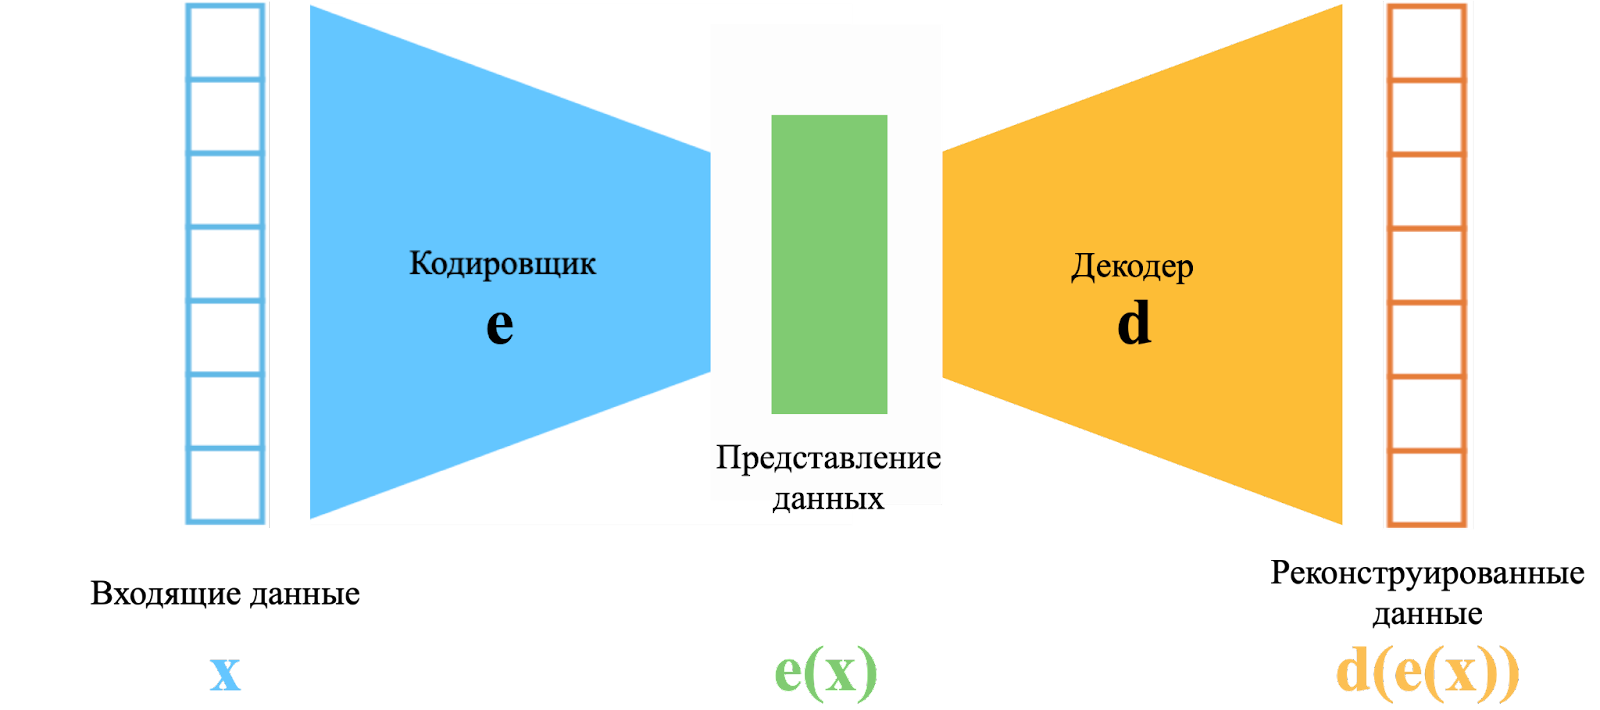

## <center>Обучение автоэнкодеров
Большой плюс генеративных моделей состоит в том, что нам не нужны метки данных.

Чтобы применить на практике полученные знания, давайте создадим наш первый автоэнкодер для восстановления изображений датасета MNIST.

### ЭНКОДЕР
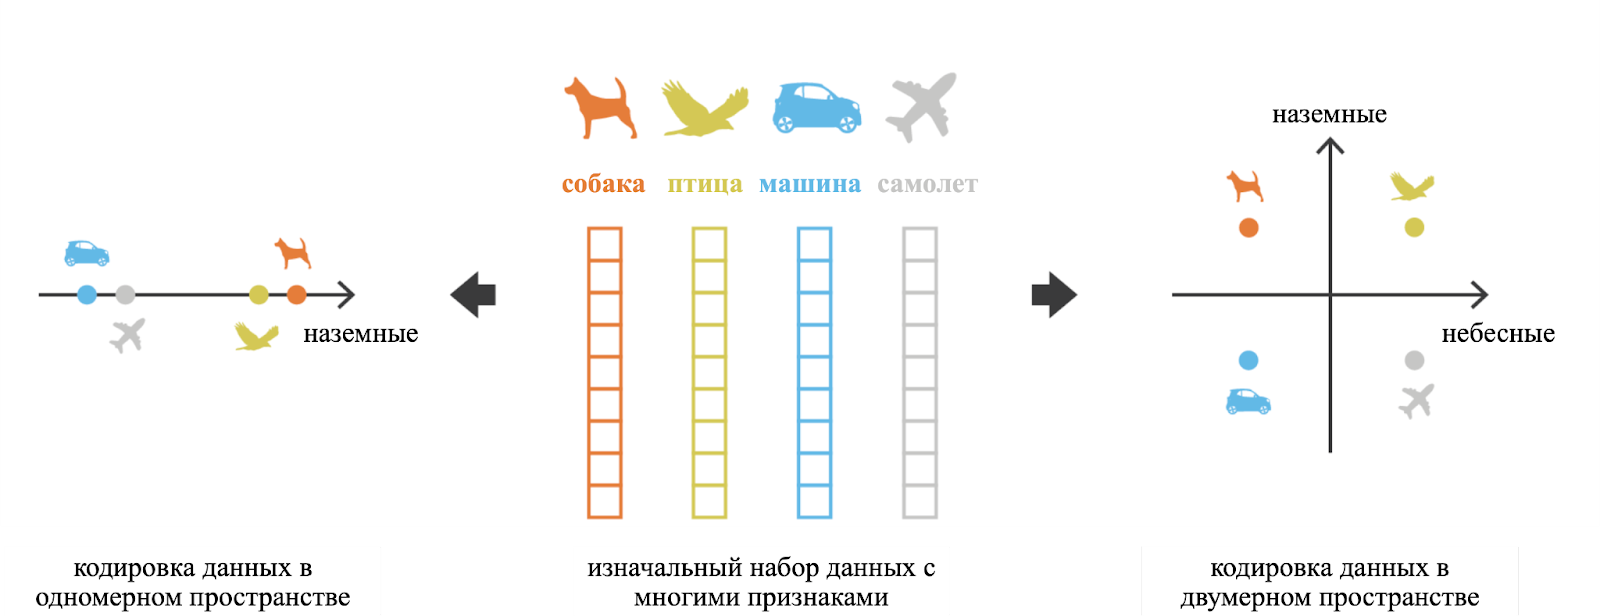

>**Задача кодировщика** — взять входное изображение и сопоставить его с точкой в скрытом пространстве представления данных. На вход кодировщика поступают изображения из датасета MNIST. Мы будем использовать следующие слои кодировщика:

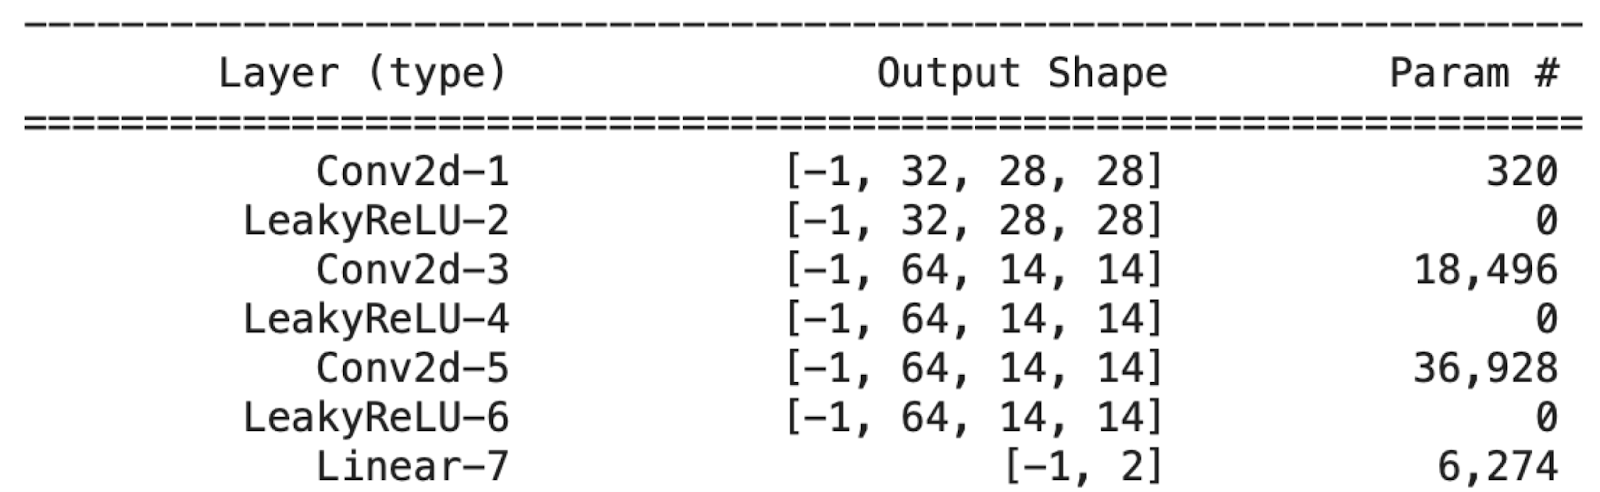

### ДЕКОДЕР
>**Декодер** учится преобразовывать в изображения точки в скрытом пространстве.

В нашей архитектуре вектор скрытого пространства состоит из двух нейронов. Декодер берёт этот вектор и отображает его обратно в исходное пространство изображения. Архитектура декодера выглядит так:

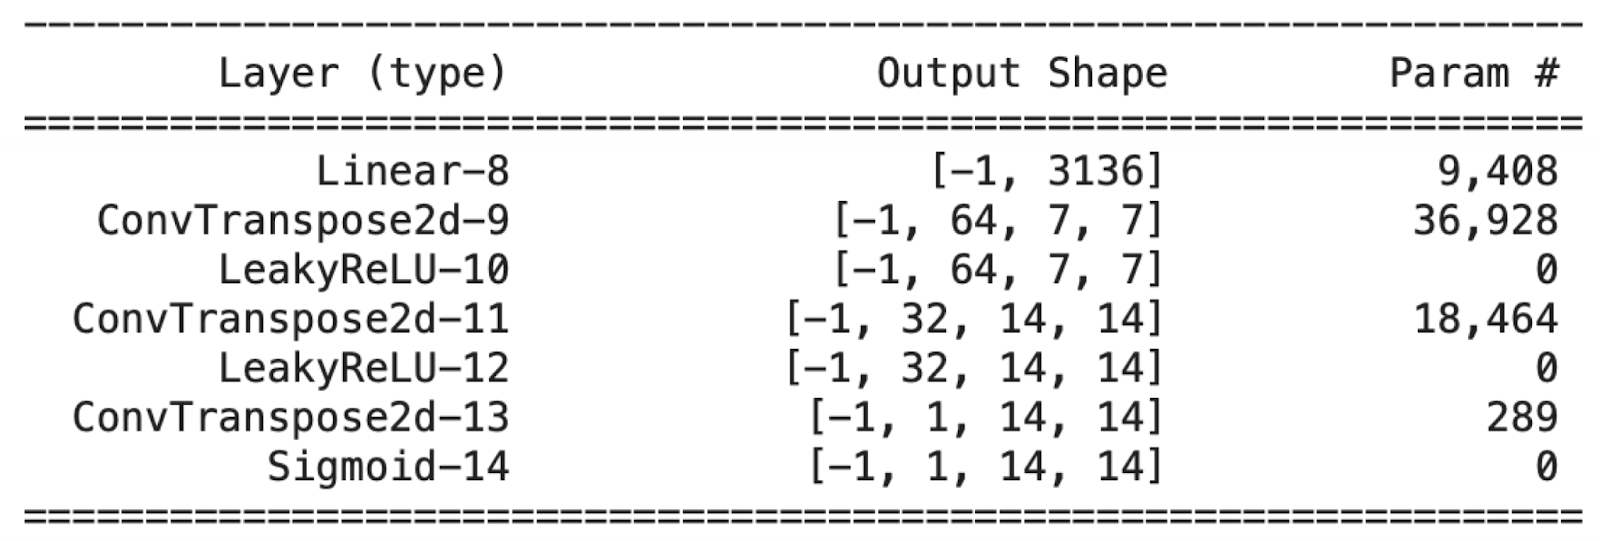

В декодере появляется необычный **транспонированный свёрточный слой**.

* **Обычный свёрточный слой** можно использовать для уменьшения размера входных данных вдвое с помощью страйда 2.  
    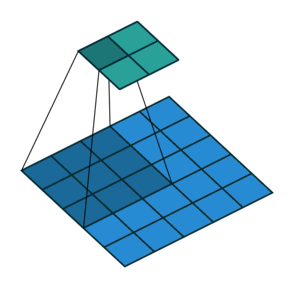

* **Слой свёрточного транспонирования** можно использовать для обратной задачи. Когда этот слой используется с шагом 2, он удваивает размер входных данных.  
    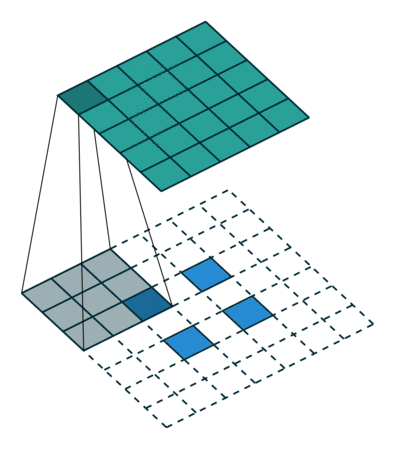


## <center>Геометрическое исследование пространства признаков
### ОБУЧЕНИЕ МНОГООБРАЗИЯ (MANIFOLD LEARNING)
Давайте подробнее разберём скрытое представление данных. Для удобства воспользуемся наглядным примером применения автоэнкодера (AE) на датасете MNIST.

Цифры, изображённые на примерах из MNIST, являются элементами 784-мерного пространства (28x28). Такая размерность пространства является очень большой, и большинство методов уменьшения размерности пытаются использовать предположение, что не все элементы пространства необходимы для различения цифр (или, в более общем смысле, извлечения признаков).

Автоэнкодеры с размерностью скрытого представления *m* ищут *m*-мерное многообразие (*manifold*) в пространстве объектов, которое наилучшим способом передаёт нужную информацию в выборке, а представление параметризует это многообразие. При этом энкодер сопоставляет объект с элементом многообразия, а декодер ищет соответствие данному элементу в пространстве объектов.

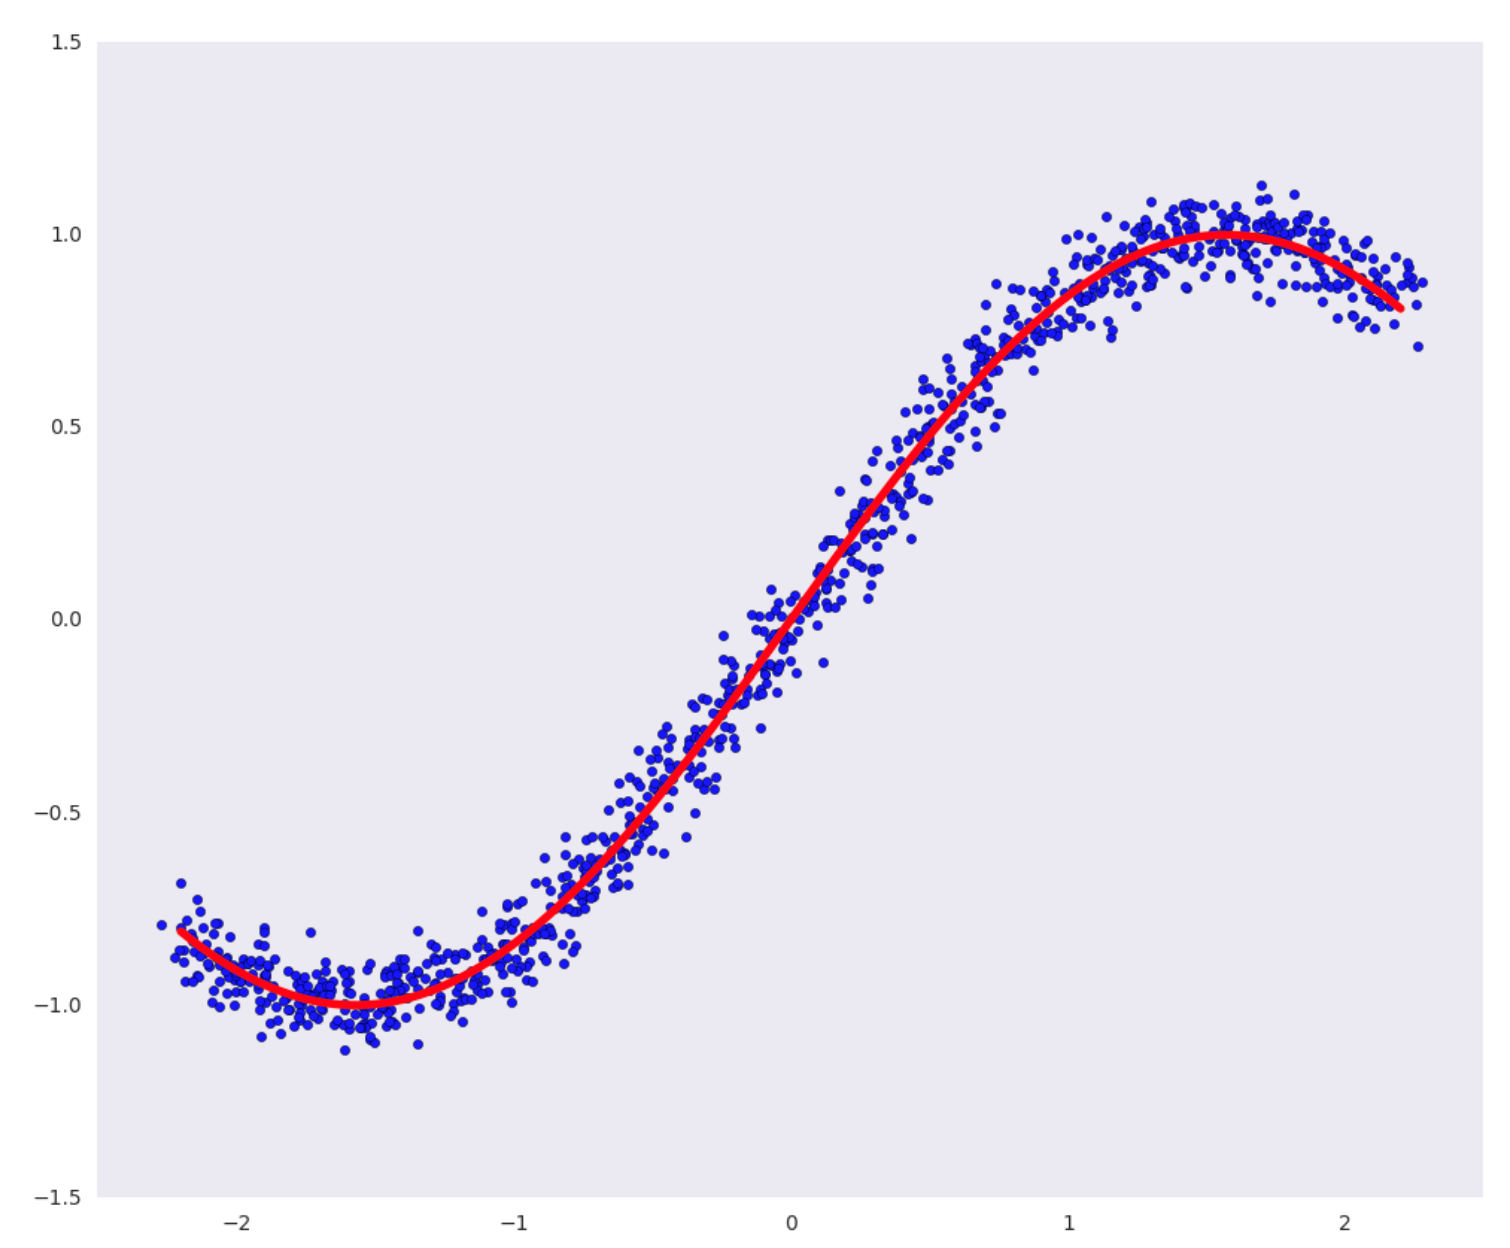

<center><i>Многообразие. Синие точки характеризуют данные, красная кривая — многообразие, определяющее данные.</i></center>

### ЛАТЕНТНЫЕ ПЕРЕМЕННЫЕ
Мы можем рассматривать процесс генерации новых данных $X$ как процесс, зависящий от некоторого количества скрытых (латентных) переменных $Z$.

>**Латентная переменная** — это случайная величина, которую нельзя наблюдать напрямую, но она закладывает основу того, как распределяются данные. Размерность данных $X$ может значительно превышать размерность скрытых случайных величин $Z$.

Вернёмся к примеру генерации цифры в *MNIST*. Для генерации новых изображений нам необходимо:

* узнать распределение вероятностей по существующим изображениям $X$;

* определить распределение, которое может моделировать сложные корреляции между всеми пикселями, образующими каждое изображение.

Прямое моделирование этого распределения — утомительная и сложная задача. Мы предполагаем, что на результат генерации могут влиять различные факторы, например наклон цифры, её ширина, аккуратность почерка и т. д. Каждый из этих факторов обладает собственным распределением. Вместо прямого моделирования $p(X)$ мы можем ввести скрытую (ненаблюдаемую) переменную $Z$, определяющую эти факторы влияния, и найти условное распределение $p(X|Z)$ для данных. С вероятностной точки зрения $Z$ можно интерпретировать как **непрерывную случайную величину**. 

Имея $Z$, мы можем дополнительно ввести априорное распределение $p(Z)$ по скрытым переменным, чтобы вычислить совместное распределение по наблюдаемым и скрытым переменным $p(X,Z) = p(X|Z) \times p(Z)$.  

$p(X|Z)$ приближает декодер.  
$p(Z)$ может иметь сложную форму, так как, например, ширина и наклон цифры зависят от почерка.



## <center>Вариационные автоэнкодеры
>**Вариационный автоэнкодер (VAE)** — это автоэнкодер, распределение кодировок которого регулируется во время обучения, чтобы гарантировать, что его скрытое пространство имеет хорошие свойства, позволяющие генерировать некоторые новые данные. Более того, термин «вариационный» происходит от тесной связи между регуляризацией и методом вариационного вывода в статистике.

### ОГРАНИЧЕНИЯ СТАНДАРТНОГО АВТОЭНКОДЕРА
Здесь возникает естественный вопрос: **«Какая связь между автоэнкодерами и генерацией контента?»**.

Действительно, после того как автоэнкодер обучен, у нас есть и кодировщик, и декодер, но по-прежнему **нет реального способа создавать какой-либо новый контент**. Соблазнительная мысль: если скрытое пространство достаточно регулярное (хорошо «организованное» кодировщиком в процессе обучения), мы могли бы случайным образом взять точку из этого скрытого пространства и декодировать её, чтобы получить новое содержание. 

Однако **регулярность скрытого пространства для автокодировщиков является сложной задачей**, которая зависит от распределения данных в исходном пространстве, размера скрытого пространства и архитектуры кодировщика. Таким образом, довольно сложно (если не невозможно) априори гарантировать, что кодировщик будет организовывать скрытое пространство разумным способом, совместимым с генеративным процессом, который мы только что описали.

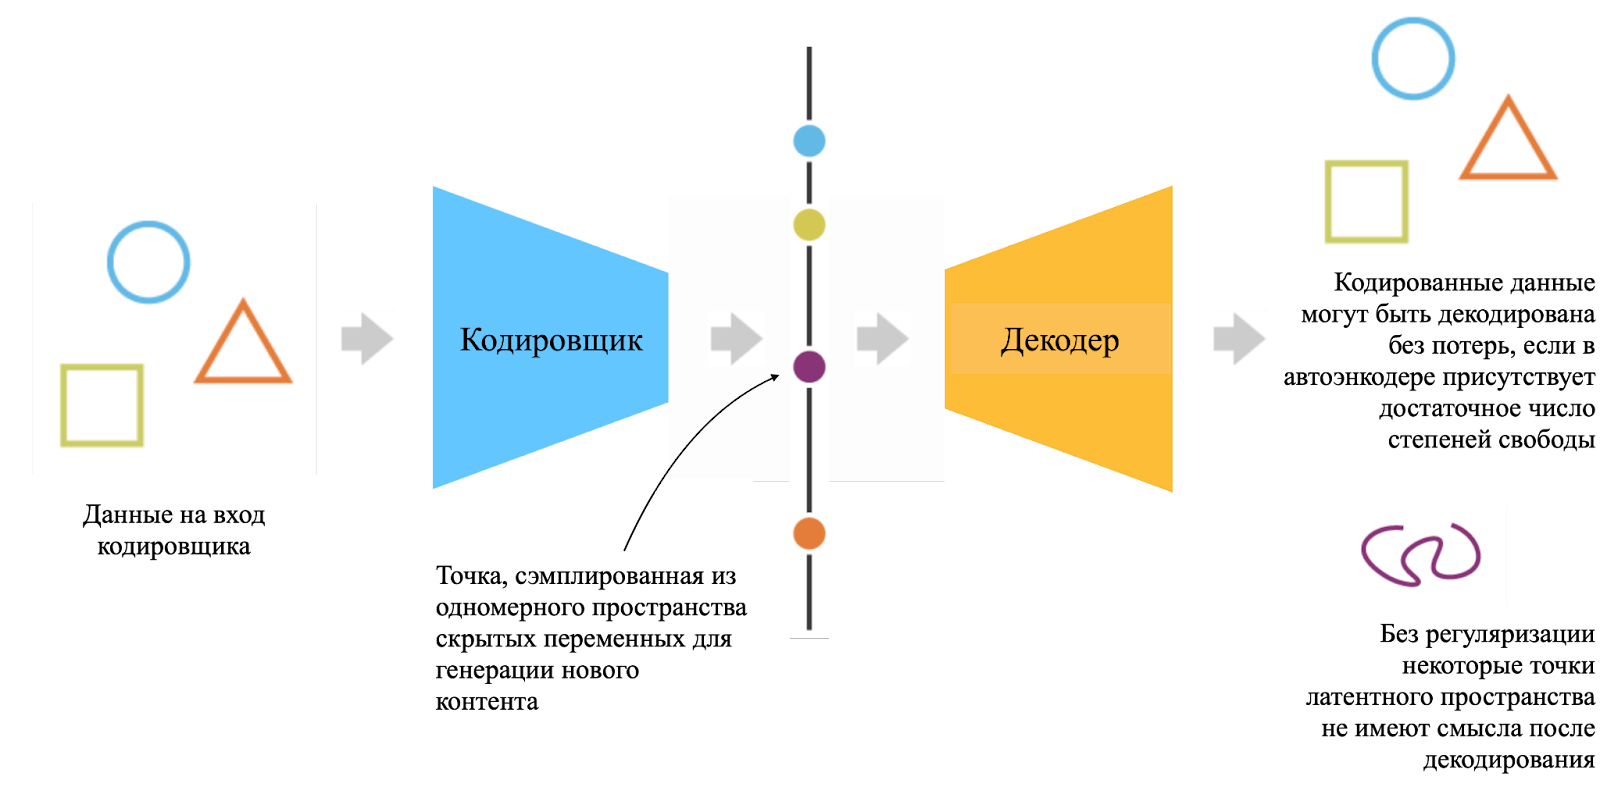

<center><i>Иллюстрация того, что неравномерное латентное пространство мешает использовать автоэнкодер для генерации качественно нового контента</i></center>

### ОПРЕДЕЛЕНИЕ ВАРИАЦИОННОГО АВТОЭНКОДЕРА
Итак, чтобы иметь возможность использовать декодер нашего автоэнкодера в генеративных целях, мы должны быть уверены, что скрытое пространство достаточно регулярное. Одним из возможных решений для получения такой регулярности является введение **явной регуляризации** в процессе обучения.

>**Вариационный автокодировщик** можно определить как автоэнкодер, обучение которого упорядочено, чтобы избежать переобучения и гарантировать, что скрытое пространство имеет хорошие свойства, которые позволяют генерировать процесс.

Как и стандартный автоэнкодер, вариационный автоэнкодер представляет собой архитектуру, состоящую из энкодера и декодера, которая обучена минимизировать ошибку восстановления между кодированными-декодированными данными и исходными данными.

Однако, чтобы ввести некоторую регуляризацию скрытого пространства, мы приступаем к небольшой модификации процесса кодирования-декодирования: **вместо кодирования ввода как одной точки мы кодируем его как распределение по скрытому пространству.**

Затем **модель обучается следующим образом:**

1. Ввод кодируется как распределение по скрытому пространству.
2. Из данного распределения выбирается точка из скрытого пространства.
3. Точка декодируется.
4. Может быть вычислена ошибка восстановления.
5. Наконец, ошибка восстановления распространяется по нейронной сети (происходит процесс backpropagation).

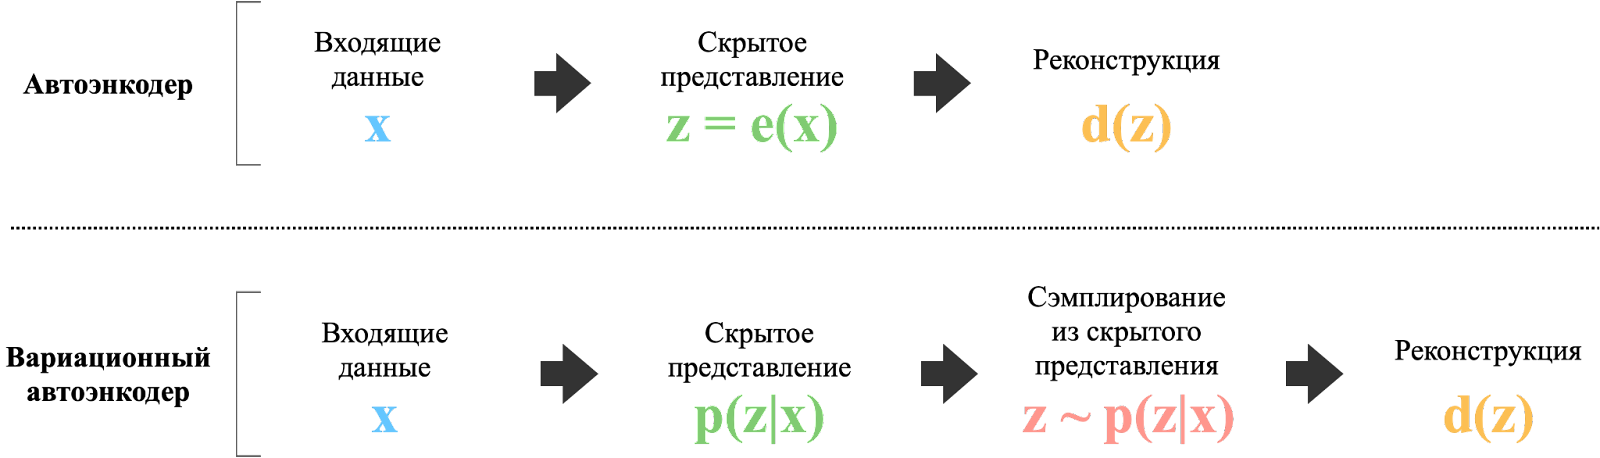

### ФУНКЦИЯ ПОТЕРЬ *VAE*
На практике закодированные распределения выбираются нормальными, чтобы кодировщик можно было обучить возвращать среднее значение и матрицу ковариации, которые описывают заданные гауссовские процессы.

Причина, по которой входные данные кодируются как распределение с некоторой дисперсией вместо одной точки, заключается в том, что оно позволяет очень естественно выразить регуляризацию скрытого пространства: распределения, возвращаемые кодировщиком, принудительно должны быть близки к стандартному нормальному распределению.

Таким образом, функция потерь, которая минимизируется при обучении *VAE*, состоит из **«реконструкции»**, которая стремится сделать схему кодирования-декодирования максимально производительной, и **«регуляризации»**, которая стремится упорядочить организацию скрытого пространства, делая распределения, возвращаемые кодировщиком, близкими к стандартному нормальному распределению.

Этот параметр регуляризации выражается как **дивергенция Кульбака-Лейблера** между возвращённым распределением и стандартным гауссовым распределением.

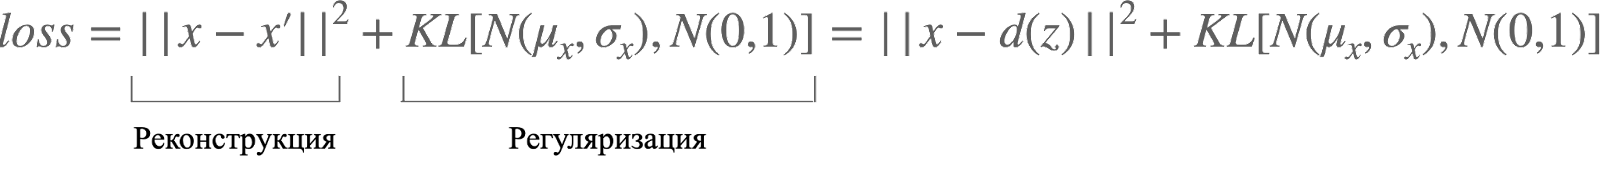

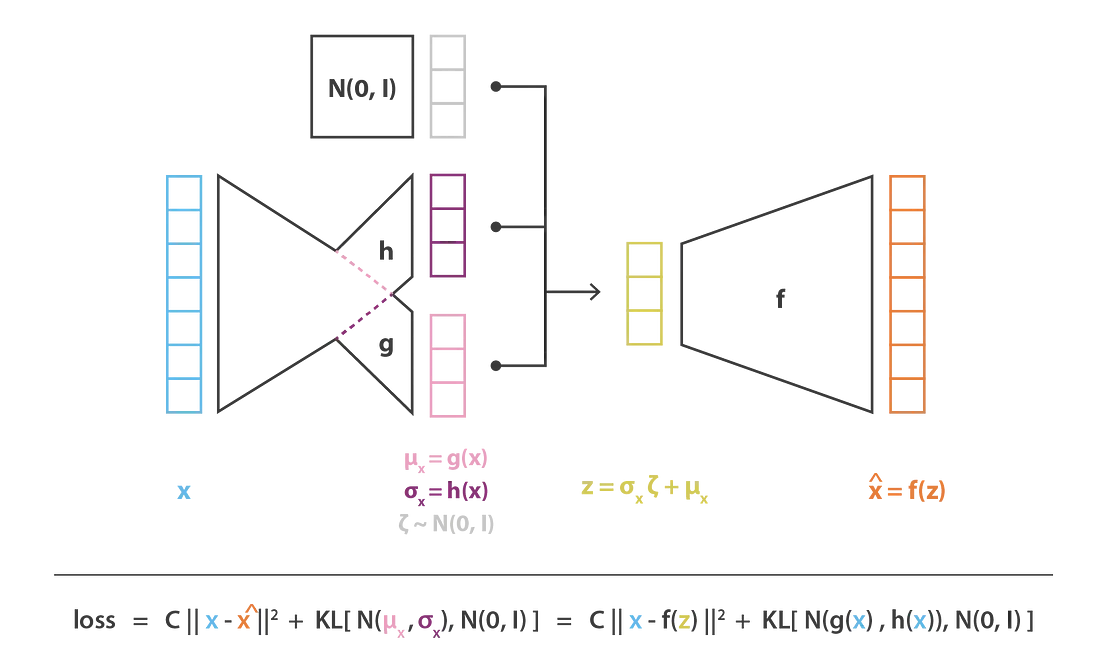